In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import joblib
from surprise import Dataset, Reader, SVD
from surprise.model_selection import cross_validate

# Load datasets
books = pd.read_csv('data/books.csv')
ratings = pd.read_csv('data/ratings.csv')
to_read = pd.read_csv('data/to_read.csv')
tags = pd.read_csv('data/tags.csv')
book_tags = pd.read_csv('data/book_tags.csv')

In [2]:
# Display basic info
books.info()
books.head()

# Check for missing values
print(books.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   book_id                    10000 non-null  int64  
 1   goodreads_book_id          10000 non-null  int64  
 2   best_book_id               10000 non-null  int64  
 3   work_id                    10000 non-null  int64  
 4   books_count                10000 non-null  int64  
 5   isbn                       9300 non-null   object 
 6   isbn13                     9415 non-null   float64
 7   authors                    10000 non-null  object 
 8   original_publication_year  9979 non-null   float64
 9   original_title             9415 non-null   object 
 10  title                      10000 non-null  object 
 11  language_code              8916 non-null   object 
 12  average_rating             10000 non-null  float64
 13  ratings_count              10000 non-null  int6

In [4]:
# Display basic info
ratings.info()
ratings.head()

# Check for missing values
print(ratings.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5976479 entries, 0 to 5976478
Data columns (total 3 columns):
 #   Column   Dtype
---  ------   -----
 0   user_id  int64
 1   book_id  int64
 2   rating   int64
dtypes: int64(3)
memory usage: 136.8 MB
user_id    0
book_id    0
rating     0
dtype: int64


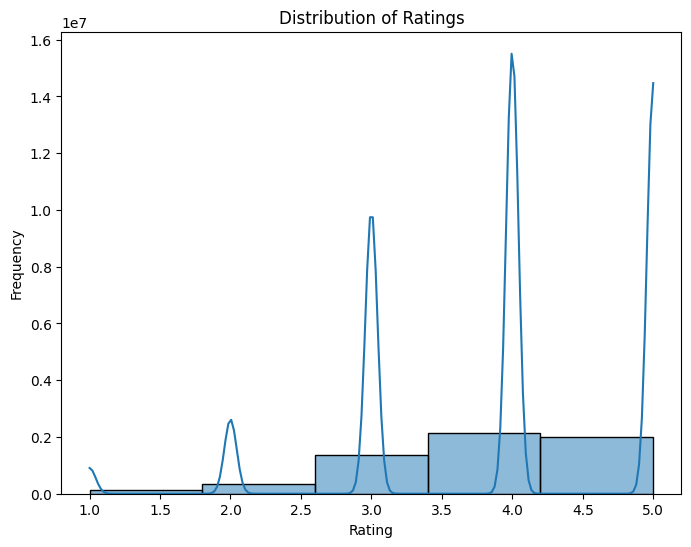

In [5]:
# Check the distribution of ratings
plt.figure(figsize=(8, 6))
sns.histplot(ratings['rating'], bins=5, kde=True)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

In [6]:
# Display basic info
to_read.info()
to_read.head()

# Check for missing values
print(to_read.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 912705 entries, 0 to 912704
Data columns (total 2 columns):
 #   Column   Non-Null Count   Dtype
---  ------   --------------   -----
 0   user_id  912705 non-null  int64
 1   book_id  912705 non-null  int64
dtypes: int64(2)
memory usage: 13.9 MB
user_id    0
book_id    0
dtype: int64


In [7]:
# Display basic info
tags.info()
tags.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34252 entries, 0 to 34251
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   tag_id    34252 non-null  int64 
 1   tag_name  34252 non-null  object
dtypes: int64(1), object(1)
memory usage: 535.3+ KB


,tag_id,tag_name
0,0,-
1,1,--1-
2,2,--10-
3,3,--12-
4,4,--122-


In [8]:
# Display basic info
book_tags.info()
book_tags.head()

# Check for missing values
print(book_tags.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999912 entries, 0 to 999911
Data columns (total 3 columns):
 #   Column             Non-Null Count   Dtype
---  ------             --------------   -----
 0   goodreads_book_id  999912 non-null  int64
 1   tag_id             999912 non-null  int64
 2   count              999912 non-null  int64
dtypes: int64(3)
memory usage: 22.9 MB
goodreads_book_id    0
tag_id               0
count                0
dtype: int64


In [9]:
# Create a Surprise dataset from the ratings DataFrame
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(ratings[['user_id', 'book_id', 'rating']], reader)


In [14]:
trainset = data.build_full_trainset() 

In [15]:
algo = SVD()
algo.fit(trainset)

In [17]:
from surprise import accuracy
testset = trainset.build_testset()  # Create a testset from the trainset
predictions = algo.test(testset)
accuracy.rmse(predictions)

RMSE: 0.6448


0.6447506750901185

In [18]:
import pickle

# Assuming 'algo' is your trained model
with open('model.pkl', 'wb') as model_file:
    pickle.dump(algo, model_file)